In [1]:
##CASE STUDY - Lead Score analysis

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
#reading Dataset
Lead_Data = pd.read_csv("Leads.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)
Lead_Data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#Checking the info on the columns and null value present in each column
Lead_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
#Checking for the percentage of null values
round(100*(Lead_Data.isnull().sum()/len(Lead_Data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [6]:
#Converting the 'Select' value present in few columns to 'NaN'
Lead_Data['Lead Quality'].replace(['Select'],['NaN'], inplace= True)
Lead_Data['City'].replace(['Select'],['NaN'], inplace= True)
Lead_Data['Lead Profile'].replace(['Select'],['NaN'], inplace= True)
Lead_Data['Specialization'].replace(['Select'],['NaN'], inplace= True)
Lead_Data['How did you hear about X Education'].replace(['Select'],['NaN'], inplace= True)
Lead_Data['Country'].replace(['unknown'],['NaN'], inplace= True)
Lead_Data.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [7]:
#Dropping the columns with null values more than 3000 and also the irrelavant columns
Lead_Data = Lead_Data.drop(['Lead Quality','How did you hear about X Education','Newspaper','Search','Magazine','Newspaper Article','X Education Forums','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','Do Not Call','Do Not Email','City','Specialization','Country','Tags','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Last Notable Activity','Lead Number'], axis=1)
Lead_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
Prospect ID                                      9240 non-null object
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
What is your current occupation                  6550 non-null object
What matters most to you in choosing a course    6531 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 722.0+ KB


In [8]:
#Creating dummy variables
lo= pd.get_dummies(Lead_Data['Lead Origin'], prefix='leadOrigin', drop_first=True)
#Adding the results to the master dataframe
Lead_Data = pd.concat([Lead_Data,lo], axis=1)

# Creating dummy variables for the variable 'Lead Source'.
ls = pd.get_dummies(Lead_Data['Lead Source'], prefix='leadSource', drop_first=True)
# Adding the results to the master dataframe
Lead_Data = pd.concat([Lead_Data,ls], axis=1)

# Creating dummy variables for the variable 'Lead Activity'.
la = pd.get_dummies(Lead_Data['Last Activity'], prefix='lastActivity', drop_first=True)
# Adding the results to the master dataframe
Lead_Data = pd.concat([Lead_Data,la], axis=1)

# Creating dummy variables for the variable 'What is your current occupation'. 
co = pd.get_dummies(Lead_Data['What is your current occupation'], prefix='currentOccupation')
# Adding the results to the master dataframe
Lead_Data = pd.concat([Lead_Data,co], axis=1)

# Creating dummy variables for the variable 'What matters most to you in choosing a course'. 
ms = pd.get_dummies(Lead_Data['What matters most to you in choosing a course'], prefix='mattersMost')
# Adding the results to the master dataframe
Lead_Data = pd.concat([Lead_Data,ms], axis=1)

In [9]:
#Checking for the dataframe info after creating dummy variables
Lead_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 59 columns):
Prospect ID                                      9240 non-null object
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
What is your current occupation                  6550 non-null object
What matters most to you in choosing a course    6531 non-null object
leadOrigin_Landing Page Submission               9240 non-null uint8
leadOrigin_Lead Add Form                         9240 non-null uint8
leadOrigin_Lead Import                           9240 n

In [10]:
#Dropping the original columns from which dummy variables were created and also dummy columns which were insignificant
Lead_Data = Lead_Data.drop(['leadSource_blog','leadSource_bing','leadSource_Live Chat','leadSource_Social Media','leadSource_Press_Release','leadSource_NC_EDM','leadSource_Pay per Click Ads','leadSource_welearnblog_Home','leadSource_WeLearn','leadSource_youtubechannel','leadSource_testone','leadSource_Facebook','leadSource_Referral Sites','leadSource_Welingak Website','lastActivity_Email Received','lastActivity_Form Submitted on Website','lastActivity_Resubscribed to emails','lastActivity_View in browser link Clicked','lastActivity_Email Marked Spam','lastActivity_Had a Phone Conversation','lastActivity_Unreachable','lastActivity_Unsubscribed','lastActivity_Email Bounced','lastActivity_Email Link Clicked','Lead Origin','Lead Source','Last Activity','What is your current occupation','What matters most to you in choosing a course'], axis=1)
Lead_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
Prospect ID                                9240 non-null object
Converted                                  9240 non-null int64
TotalVisits                                9103 non-null float64
Total Time Spent on Website                9240 non-null int64
Page Views Per Visit                       9103 non-null float64
leadOrigin_Landing Page Submission         9240 non-null uint8
leadOrigin_Lead Add Form                   9240 non-null uint8
leadOrigin_Lead Import                     9240 non-null uint8
leadOrigin_Quick Add Form                  9240 non-null uint8
leadSource_Direct Traffic                  9240 non-null uint8
leadSource_Google                          9240 non-null uint8
leadSource_Olark Chat                      9240 non-null uint8
leadSource_Organic Search                  9240 non-null uint8
leadSource_Reference                       9240 non-null uint8
leadSo

In [11]:
#Checking for Outliers
num_Lead = Lead_Data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
num_Lead.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9240.000000,9103.000000
mean,3.445238,487.698268,2.362820
std,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


As we can see, Total Visits and Page Views per visit need outlier treatment

In [12]:
#Removing the outliers
Q1 = Lead_Data.TotalVisits.quantile(0.25)
Q3 = Lead_Data.TotalVisits.quantile(0.75)
IQR = Q3 - Q1
Lead_Data = Lead_Data[(Lead_Data.TotalVisits >= Q1 - 1.5*IQR) & (Lead_Data.TotalVisits <= Q3 + 1.5*IQR)]

In [13]:
#Converting the Column names to remove spaces
Lead_Data.rename(columns={'Total Time Spent on Website':'TotalTimeWebsite',
                          'Page Views Per Visit':'PageViewVisits'}, 
                 inplace=True)

In [14]:
Lead_Data.describe()

,Converted,TotalVisits,TotalTimeWebsite,PageViewVisits,leadOrigin_Landing Page Submission,leadOrigin_Lead Add Form,leadOrigin_Lead Import,leadOrigin_Quick Add Form,leadSource_Direct Traffic,leadSource_Google,...,lastActivity_Visited Booth in Tradeshow,currentOccupation_Businessman,currentOccupation_Housewife,currentOccupation_Other,currentOccupation_Student,currentOccupation_Unemployed,currentOccupation_Working Professional,mattersMost_Better Career Prospects,mattersMost_Flexibility & Convenience,mattersMost_Other
count,8836.000000,8836.000000,8836.000000,8836.000000,8836.000000,8836.000000,8836.000000,8836.0,8836.000000,8836.000000,...,8836.000000,8836.000000,8836.000000,8836.000000,8836.000000,8836.000000,8836.000000,8836.000000,8836.000000,8836.000000
mean,0.378452,2.985627,474.798891,2.275965,0.530217,0.068357,0.003508,0.0,0.277501,0.317338,...,0.000113,0.000792,0.001019,0.001471,0.023087,0.602309,0.074694,0.701109,0.000113,0.000113
std,0.485029,2.582935,543.461506,1.961492,0.499114,0.252371,0.059131,0.0,0.447791,0.465467,...,0.010638,0.028137,0.031900,0.038331,0.150190,0.489449,0.262913,0.457798,0.010638,0.010638
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,237.000000,2.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,4.000000,903.000000,3.000000,1.000000,0.000000,0.000000,0.0,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,11.000000,2272.000000,11.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
#Outlier treatment for PageViewVisits
Q1 = Lead_Data.PageViewVisits.quantile(0.25)
Q3 = Lead_Data.PageViewVisits.quantile(0.75)
IQR = Q3 - Q1
Lead_Data = Lead_Data[(Lead_Data.PageViewVisits >= Q1 - 1.5*IQR) & (Lead_Data.PageViewVisits <= Q3 + 1.5*IQR)]
Lead_Data.describe()

,Converted,TotalVisits,TotalTimeWebsite,PageViewVisits,leadOrigin_Landing Page Submission,leadOrigin_Lead Add Form,leadOrigin_Lead Import,leadOrigin_Quick Add Form,leadSource_Direct Traffic,leadSource_Google,...,lastActivity_Visited Booth in Tradeshow,currentOccupation_Businessman,currentOccupation_Housewife,currentOccupation_Other,currentOccupation_Student,currentOccupation_Unemployed,currentOccupation_Working Professional,mattersMost_Better Career Prospects,mattersMost_Flexibility & Convenience,mattersMost_Other
count,8542.000000,8542.000000,8542.000000,8542.000000,8542.000000,8542.000000,8542.000000,8542.0,8542.000000,8542.000000,...,8542.000000,8542.000000,8542.000000,8542.000000,8542.000000,8542.000000,8542.000000,8542.000000,8542.000000,8542.000000
mean,0.378366,2.810700,469.778740,2.076613,0.521306,0.070592,0.003512,0.0,0.277218,0.319831,...,0.000117,0.000585,0.001054,0.001405,0.023180,0.600562,0.074924,0.699368,0.000117,0.000117
std,0.485008,2.435562,542.851967,1.654045,0.499575,0.256158,0.059162,0.0,0.447651,0.466438,...,0.010820,0.024188,0.032444,0.037457,0.150482,0.489812,0.263284,0.458560,0.010820,0.010820
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,233.000000,2.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,4.000000,888.750000,3.000000,1.000000,0.000000,0.000000,0.0,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,11.000000,2272.000000,6.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
#Checking for null values from current columns
round(100*(Lead_Data.isnull().sum()/len(Lead_Data.index)), 2)

Prospect ID                                0.0
Converted                                  0.0
TotalVisits                                0.0
TotalTimeWebsite                           0.0
PageViewVisits                             0.0
leadOrigin_Landing Page Submission         0.0
leadOrigin_Lead Add Form                   0.0
leadOrigin_Lead Import                     0.0
leadOrigin_Quick Add Form                  0.0
leadSource_Direct Traffic                  0.0
leadSource_Google                          0.0
leadSource_Olark Chat                      0.0
leadSource_Organic Search                  0.0
leadSource_Reference                       0.0
leadSource_google                          0.0
lastActivity_Converted to Lead             0.0
lastActivity_Email Opened                  0.0
lastActivity_Olark Chat Conversation       0.0
lastActivity_Page Visited on Website       0.0
lastActivity_SMS Sent                      0.0
lastActivity_Visited Booth in Tradeshow    0.0
currentOccupa

In [17]:
Lead_Data.head()

,Prospect ID,Converted,TotalVisits,TotalTimeWebsite,PageViewVisits,leadOrigin_Landing Page Submission,leadOrigin_Lead Add Form,leadOrigin_Lead Import,leadOrigin_Quick Add Form,leadSource_Direct Traffic,...,lastActivity_Visited Booth in Tradeshow,currentOccupation_Businessman,currentOccupation_Housewife,currentOccupation_Other,currentOccupation_Student,currentOccupation_Unemployed,currentOccupation_Working Professional,mattersMost_Better Career Prospects,mattersMost_Flexibility & Convenience,mattersMost_Other
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,2.0,1532,2.0,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,1.0,305,1.0,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [18]:
#Standardization of the original values
df = Lead_Data[['TotalVisits','TotalTimeWebsite','PageViewVisits']]
normalized_df=(df-df.mean())/df.std()
Lead_Data = Lead_Data.drop(['TotalVisits','TotalTimeWebsite','PageViewVisits'], 1)
Lead_Data = pd.concat([Lead_Data,normalized_df],axis=1)
Lead_Data.head()

,Prospect ID,Converted,leadOrigin_Landing Page Submission,leadOrigin_Lead Add Form,leadOrigin_Lead Import,leadOrigin_Quick Add Form,leadSource_Direct Traffic,leadSource_Google,leadSource_Olark Chat,leadSource_Organic Search,...,currentOccupation_Other,currentOccupation_Student,currentOccupation_Unemployed,currentOccupation_Working Professional,mattersMost_Better Career Prospects,mattersMost_Flexibility & Convenience,mattersMost_Other,TotalVisits,TotalTimeWebsite,PageViewVisits
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,-1.154025,-0.865390,-1.255476
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0.898889,0.376201,0.255971
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,-0.332860,1.956742,-0.046319
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,1,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,-0.743442,-0.303543,-0.650897
4,3256f628-e534-4826-9d63-4a8b88782852,1,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,-0.332860,1.765161,-0.650897


In [19]:
#Checking the Conversion rate
Converted = (sum(Lead_Data['Converted'])/len(Lead_Data['Converted'].index))*100
Converted

37.83657223132756

### Spiltting the data set for x and y variables

In [20]:
#Spiltting the training set
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = Lead_Data.drop(['Converted','Prospect ID'],axis=1)

# Putting response variable to y
y = Lead_Data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

# Splitting the data into train and test

In [21]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [22]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

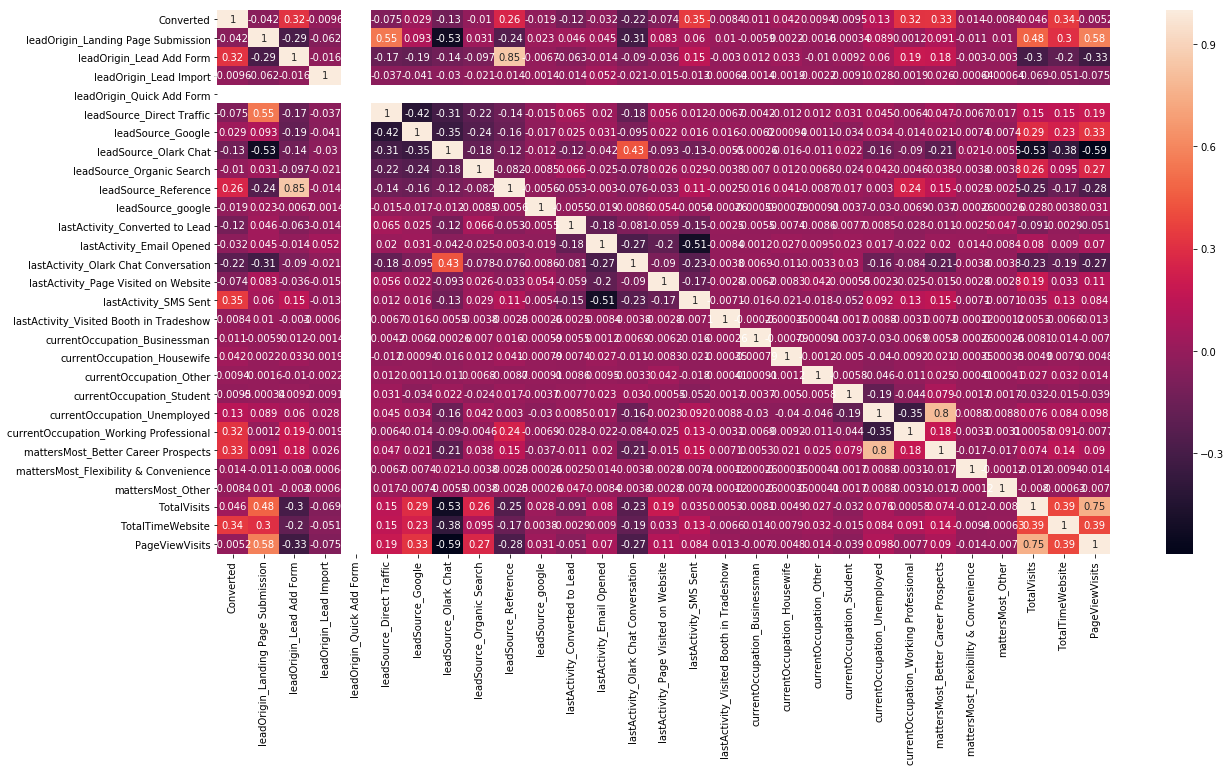

In [23]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(Lead_Data.corr(),annot = True)

In [24]:
Lead_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8542 entries, 0 to 9239
Data columns (total 30 columns):
Prospect ID                                8542 non-null object
Converted                                  8542 non-null int64
leadOrigin_Landing Page Submission         8542 non-null uint8
leadOrigin_Lead Add Form                   8542 non-null uint8
leadOrigin_Lead Import                     8542 non-null uint8
leadOrigin_Quick Add Form                  8542 non-null uint8
leadSource_Direct Traffic                  8542 non-null uint8
leadSource_Google                          8542 non-null uint8
leadSource_Olark Chat                      8542 non-null uint8
leadSource_Organic Search                  8542 non-null uint8
leadSource_Reference                       8542 non-null uint8
leadSource_google                          8542 non-null uint8
lastActivity_Converted to Lead             8542 non-null uint8
lastActivity_Email Opened                  8542 non-null uint8
lastActivi

# Removing the columns with high correlation

In [25]:
X_test = X_test.drop(['leadOrigin_Landing Page Submission','mattersMost_Better Career Prospects','TotalVisits','PageViewVisits'],1)
X_train = X_train.drop(['leadOrigin_Landing Page Submission','mattersMost_Better Career Prospects','TotalVisits','PageViewVisits'],1)

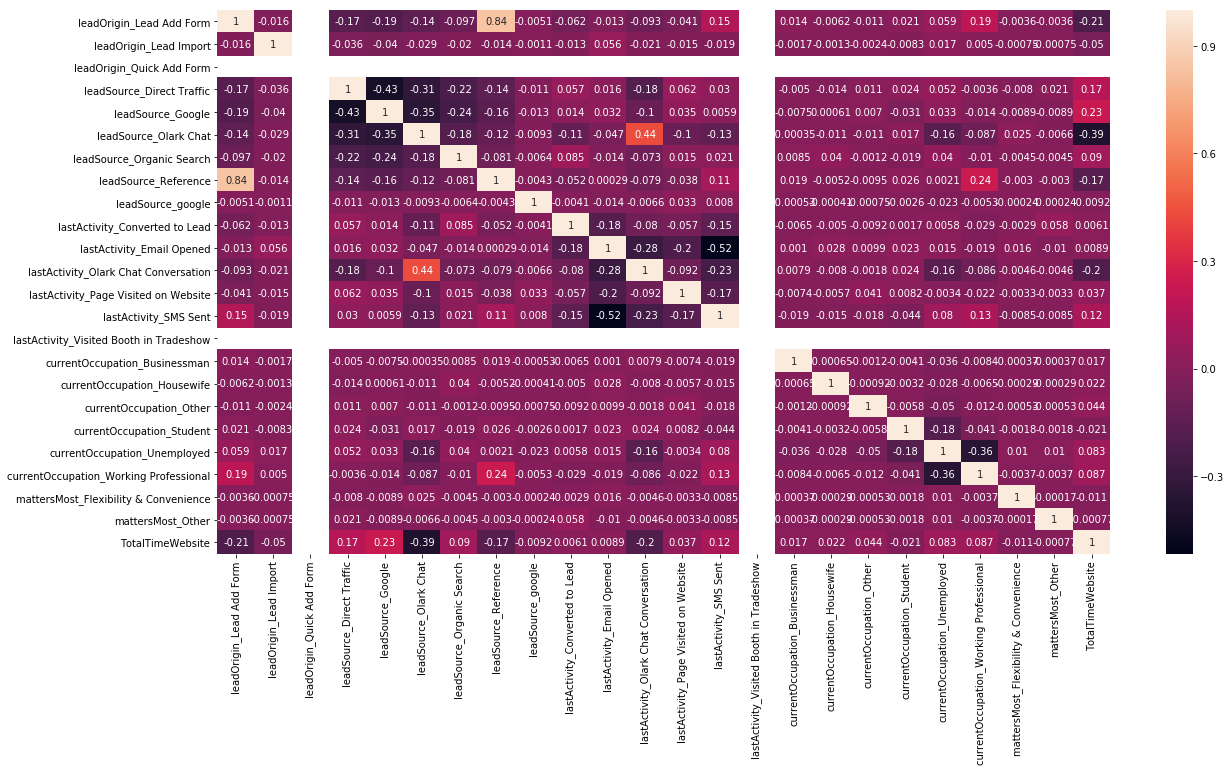

In [26]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)

In [27]:
X_test = X_test.drop(['leadSource_Reference'],1)
X_train = X_train.drop(['leadSource_Reference'],1)

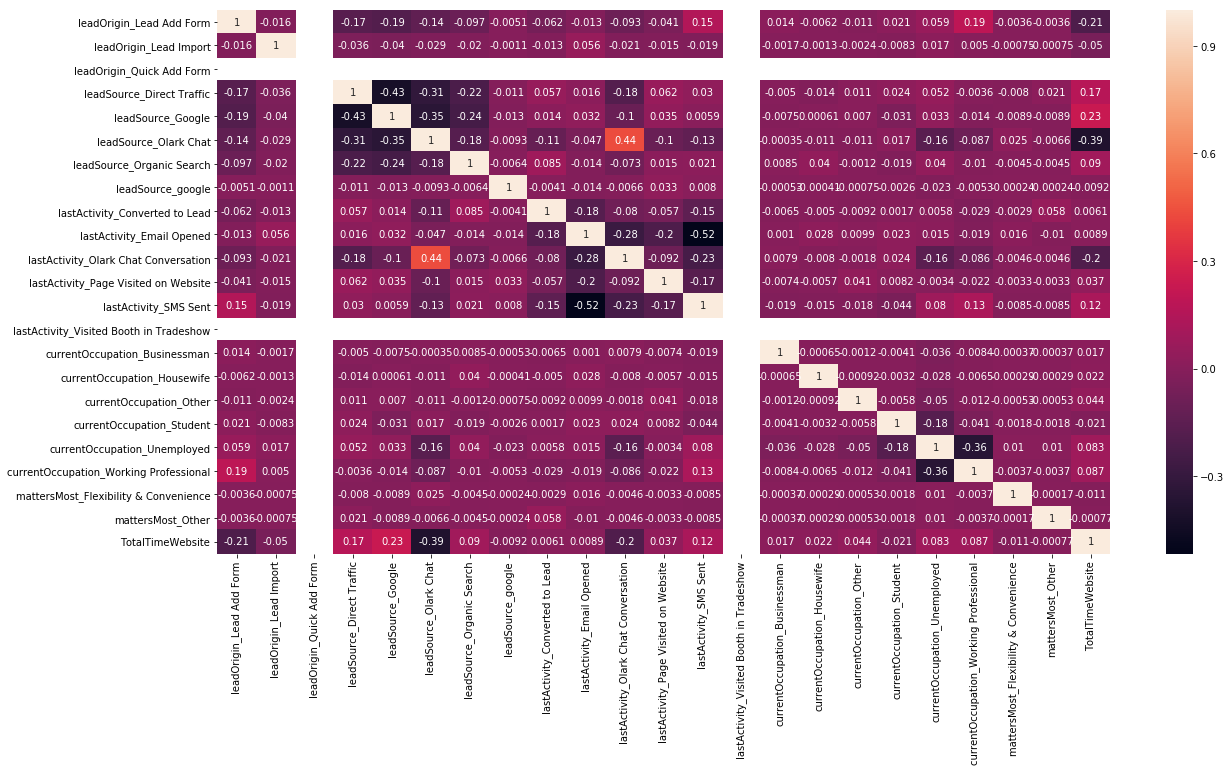

In [28]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)

## Building the First Model

In [29]:
#Running the first Training Model
import statsmodels.api as sm

In [30]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5957
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2441.2
Date:                Sun, 03 Mar 2019   Deviance:                       4882.3
Time:                        14:34:09   Pearson chi2:                 5.98e+03
No. Iterations:                    21   Covariance Type:             nonrobust
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.8219      0.344     -8.203      0.000      -3.496      -2.148
leadOrigin_Lead Add Form                    3.7392      0.379      9.869      0.000       2.997       4.482
leadOrigin_Lead Import                      0.1947      0.657      0.296      0.767      -1.092       1.481
leadOrigin_Quick Add Form               -1.138e-10   1.61e-07     -0.001      0.999   -3.15e-07    3.15e-07
leadSource_Direct Traffic                  -0.4816      0.321     -1.499      0.134      -1.112       0.148
leadSource_Google                          -0.0613      0.320     -0.192      0.848      -0.688       0.565
leadSource_Olark Chat                       1.1470      0.327      3.505      0.000       0.506       1.788
leadSource_Organic Search                  -0.1825      0.331     -0.552      0.581      -0.831       0.466
leadSource_google                         -20.4668   3.09e+04     -0.001      0.999   -6.07e+04    6.06e+04
lastActivity_Converted to Lead             -0.6036      0.251     -2.404      0.016      -1.096      -0.111
lastActivity_Email Opened                   0.7469      0.137      5.442      0.000       0.478       1.016
lastActivity_Olark Chat Conversation       -0.9259      0.209     -4.426      0.000      -1.336      -0.516
lastActivity_Page Visited on Website        0.1930      0.197      0.979      0.327      -0.193       0.579
lastActivity_SMS Sent                       1.8517      0.140     13.183      0.000       1.576       2.127
lastActivity_Visited Booth in Tradeshow  2.395e-10   3.64e-07      0.001      0.999   -7.12e-07    7.13e-07
currentOccupation_Businessman               1.8574      1.215      1.528      0.126      -0.525       4.239
currentOccupation_Housewife                24.3612   2.31e+04      0.001      0.999   -4.52e+04    4.53e+04
currentOccupation_Other                     1.1973      0.724      1.654      0.098      -0.221       2.616
currentOccupation_Student                   1.2826      0.254      5.042      0.000       0.784       1.781
currentOccupation_Unemployed                1.3125      0.090     14.504      0.000       1.135       1.490
currentOccupation_Working Professional      3.8569      0.206     18.764      0.000       3.454       4.260
mattersMost_Flexibility & Convenience      23.1288   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
mattersMost_Other                         -19.9073   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
TotalTimeWebsite                            1.0945      0.042     26.238      0.000       1.013       1.176
===========================================================================================================
"""

# RFE Analysis

In [31]:
#RFE selection
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 10)             # running RFE with 10 variables as output
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[ True False False False False  True False False  True False  True False
  True False False  True False  True  True  True False False  True]
[ 1 11 14  6  8  1  7  9  1  4  1 10  1 13  3  1  2  1  1  1  5 12  1]


[('leadOrigin_Lead Add Form', True, 1),
 ('leadOrigin_Lead Import', False, 11),
 ('leadOrigin_Quick Add Form', False, 14),
 ('leadSource_Direct Traffic', False, 6),
 ('leadSource_Google', False, 8),
 ('leadSource_Olark Chat', True, 1),
 ('leadSource_Organic Search', False, 7),
 ('leadSource_google', False, 9),
 ('lastActivity_Converted to Lead', True, 1),
 ('lastActivity_Email Opened', False, 4),
 ('lastActivity_Olark Chat Conversation', True, 1),
 ('lastActivity_Page Visited on Website', False, 10),
 ('lastActivity_SMS Sent', True, 1),
 ('lastActivity_Visited Booth in Tradeshow', False, 13),
 ('currentOccupation_Businessman', False, 3),
 ('currentOccupation_Housewife', True, 1),
 ('currentOccupation_Other', False, 2),
 ('currentOccupation_Student', True, 1),
 ('currentOccupation_Unemployed', True, 1),
 ('currentOccupation_Working Professional', True, 1),
 ('mattersMost_Flexibility & Convenience', False, 5),
 ('mattersMost_Other', False, 12),
 ('TotalTimeWebsite', True, 1)]

In [32]:
#Assigning the selected columns to col variable
col = X_train.columns[rfe.support_]

In [33]:
##Checking the removed columns from RFE
X_train.columns[~rfe.support_]

Index(['leadOrigin_Lead Import', 'leadOrigin_Quick Add Form',
       'leadSource_Direct Traffic', 'leadSource_Google',
       'leadSource_Organic Search', 'leadSource_google',
       'lastActivity_Email Opened', 'lastActivity_Page Visited on Website',
       'lastActivity_Visited Booth in Tradeshow',
       'currentOccupation_Businessman', 'currentOccupation_Other',
       'mattersMost_Flexibility & Convenience', 'mattersMost_Other'],
      dtype='object')

In [34]:
#Accessing the model
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5968
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2476.3
Date:                Sun, 03 Mar 2019   Deviance:                       4952.6
Time:                        14:34:09   Pearson chi2:                 6.01e+03
No. Iterations:                    20   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.4629      0.093    -26.509      0.000      -2.645      -2.281
leadOrigin_Lead Add Form                   4.0224      0.219     18.333      0.000       3.592       4.452
leadSource_Olark Chat                      1.4136      0.107     13.202      0.000       1.204       1.623
lastActivity_Converted to Lead            -1.2000      0.222     -5.410      0.000      -1.635      -0.765
lastActivity_Olark Chat Conversation      -1.4810      0.173     -8.561      0.000      -1.820      -1.142
lastActivity_SMS Sent                      1.2612      0.077     16.359      0.000       1.110       1.412
currentOccupation_Housewife               23.5810    1.4e+04      0.002      0.999   -2.75e+04    2.76e+04
currentOccupation_Student                  1.2279      0.250      4.902      0.000       0.737       1.719
currentOccupation_Unemployed               1.2858      0.089     14.412      0.000       1.111       1.461
currentOccupation_Working Professional     3.8285      0.204     18.778      0.000       3.429       4.228
TotalTimeWebsite                           1.0996      0.041     26.700      0.000       1.019       1.180
==========================================================================================================
"""

# As CurrentOccupation_Housewife has high P-value, will be removing it

In [35]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1384    0.055455
2019    0.862447
3514    0.633234
5930    0.089205
1409    0.296621
1484    0.351082
4711    0.193121
9061    0.551668
3233    0.961535
7797    0.095010
dtype: float64

In [36]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.05545475, 0.86244719, 0.63323407, 0.08920475, 0.29662056,
       0.3510821 , 0.19312143, 0.55166762, 0.9615351 , 0.09500962])

In [37]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Covert_Prob':y_train_pred})
y_train_pred_final['ProbID'] = y_train.index
y_train_pred_final.head()

,Converted,Covert_Prob,ProbID
0,0,0.055455,1384
1,1,0.862447,2019
2,1,0.633234,3514
3,0,0.089205,5930
4,0,0.296621,1409


In [38]:
#Creating HotLead column to select the leads with more than 80% probability
y_train_pred_final['HotLead'] = y_train_pred_final.Covert_Prob.map(lambda x: 1 if x > 0.8 else 0)


y_train_pred_final.head()

,Converted,Covert_Prob,ProbID,HotLead
0,0,0.055455,1384,0
1,1,0.862447,2019,1
2,1,0.633234,3514,0
3,0,0.089205,5930,0
4,0,0.296621,1409,0


In [39]:
from sklearn import metrics

In [40]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.HotLead )
print(confusion)

[[3573  114]
 [1331  961]]


In [41]:
# Predicted     not_converted   Converted
# Actual
# Not_Converted        3270      365
# Converted            579       708  

In [42]:
# Let's check the overall accuracy of the tarin set
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.HotLead))

0.7583207894296705


In [43]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,leadSource_Olark Chat,1.69
7,currentOccupation_Unemployed,1.56
4,lastActivity_SMS Sent,1.48
3,lastActivity_Olark Chat Conversation,1.39
9,TotalTimeWebsite,1.32
0,leadOrigin_Lead Add Form,1.30
8,currentOccupation_Working Professional,1.19
2,lastActivity_Converted to Lead,1.05
6,currentOccupation_Student,1.02
5,currentOccupation_Housewife,1.00


In [45]:
#Dropping the currentOccupation_Housewife variable from the set due to high P-value
col = col.drop('currentOccupation_Housewife', 1)
col

Index(['leadOrigin_Lead Add Form', 'leadSource_Olark Chat',
       'lastActivity_Converted to Lead',
       'lastActivity_Olark Chat Conversation', 'lastActivity_SMS Sent',
       'currentOccupation_Student', 'currentOccupation_Unemployed',
       'currentOccupation_Working Professional', 'TotalTimeWebsite'],
      dtype='object')

In [46]:
#Rerunning the model
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5969
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2481.5
Date:                Sun, 03 Mar 2019   Deviance:                       4963.1
Time:                        14:34:10   Pearson chi2:                 6.03e+03
No. Iterations:                     6   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.4460      0.092    -26.459      0.000      -2.627      -2.265
leadOrigin_Lead Add Form                   4.0205      0.219     18.329      0.000       3.591       4.450
leadSource_Olark Chat                      1.4082      0.107     13.168      0.000       1.199       1.618
lastActivity_Converted to Lead            -1.2051      0.222     -5.435      0.000      -1.640      -0.771
lastActivity_Olark Chat Conversation      -1.4847      0.173     -8.586      0.000      -1.824      -1.146
lastActivity_SMS Sent                      1.2558      0.077     16.307      0.000       1.105       1.407
currentOccupation_Student                  1.2141      0.250      4.850      0.000       0.723       1.705
currentOccupation_Unemployed               1.2721      0.089     14.314      0.000       1.098       1.446
currentOccupation_Working Professional     3.8142      0.204     18.725      0.000       3.415       4.213
TotalTimeWebsite                           1.0994      0.041     26.732      0.000       1.019       1.180
==========================================================================================================
"""

In [47]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.05634912, 0.86260671, 0.6314935 , 0.08916352, 0.29619499,
       0.35060764, 0.19363445, 0.55572683, 0.96142391, 0.09450309])

In [48]:
y_train_pred_final['Covert_Prob'] = y_train_pred

In [49]:
# Creating new column 'HotLead' with 1 if Covert_Prob > 0.8 else 0
y_train_pred_final['HotLead'] = y_train_pred_final.Covert_Prob.map(lambda x: 1 if x > 0.8 else 0)
y_train_pred_final.head()

,Converted,Covert_Prob,ProbID,HotLead
0,0,0.056349,1384,0
1,1,0.862607,2019,1
2,1,0.631493,3514,0
3,0,0.089164,5930,0
4,0,0.296195,1409,0


In [50]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.HotLead))

0.7579862853319953


# Checking the sensitivity and specificity of the Model

In [51]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.HotLead)
confusion

array([[3573,  114],
       [1333,  959]], dtype=int64)

In [52]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [53]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.41841186736474695

In [54]:
# Let us calculate specificity
TN / float(TN+FP)

0.9690805532953621

In [55]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.030919446704637917


In [56]:
# positive predictive value 
print (TP / float(TP+FP))

0.8937558247903076


In [57]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7282918874847126


# ROC Curve

In [58]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [59]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Covert_Prob, drop_intermediate = False )

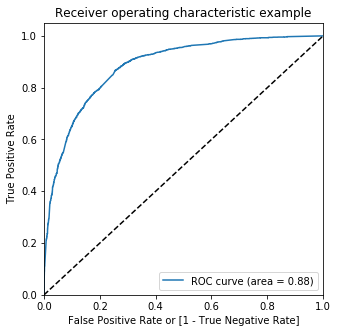

In [60]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Covert_Prob)

# Creating columns to check the accuracy of model for different cutoffs

In [61]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Covert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Covert_Prob,ProbID,HotLead,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.056349,1384,0,1,0,0,0,0,0,0,0,0,0
1,1,0.862607,2019,1,1,1,1,1,1,1,1,1,1,0
2,1,0.631493,3514,0,1,1,1,1,1,1,1,0,0,0
3,0,0.089164,5930,0,1,0,0,0,0,0,0,0,0,0
4,0,0.296195,1409,0,1,1,1,0,0,0,0,0,0,0


In [62]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383342  1.000000  0.000000
0.1   0.1  0.595417  0.981239  0.355574
0.2   0.2  0.759492  0.918848  0.660429
0.3   0.3  0.785248  0.881763  0.725251
0.4   0.4  0.807493  0.757853  0.838351
0.5   0.5  0.808329  0.681501  0.887171
0.6   0.6  0.799967  0.614311  0.915378
0.7   0.7  0.778726  0.505236  0.948739
0.8   0.8  0.757986  0.418412  0.969081
0.9   0.9  0.705302  0.251309  0.987524


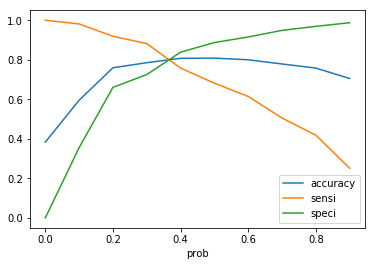

In [63]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Looks like, 0.4 probablity will get the highest accuracy from the current model

# Working on the  Test data set

In [64]:
#working on the Test data set
X_test = X_test[col]
X_test.head()

,leadOrigin_Lead Add Form,leadSource_Olark Chat,lastActivity_Converted to Lead,lastActivity_Olark Chat Conversation,lastActivity_SMS Sent,currentOccupation_Student,currentOccupation_Unemployed,currentOccupation_Working Professional,TotalTimeWebsite
7191,0,0,0,0,0,0,0,1,1.173840
1008,0,0,0,0,0,0,1,0,-0.585387
3494,0,0,0,0,1,1,0,0,1.212524
3298,0,0,0,0,1,0,1,0,0.022513
5646,1,0,0,0,0,0,1,0,-0.865390


In [65]:
X_test_sm = sm.add_constant(X_test)

In [66]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

7191    0.934548
1008    0.139740
3494    0.795268
3298    0.526642
5646    0.869343
4485    0.849537
5577    0.956088
4165    0.231134
4539    0.631493
5568    0.172743
dtype: float64

In [67]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [68]:
# Let's see the head
y_pred_1.head()

,0
7191,0.934548
1008,0.139740
3494,0.795268
3298,0.526642
5646,0.869343


In [69]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [70]:
# Putting CustID to index
y_test_df['ProbID'] = y_test_df.index

In [71]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [72]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [73]:
y_pred_final.head()

,Converted,ProbID,0
0,0,7191,0.934548
1,1,1008,0.139740
2,1,3494,0.795268
3,1,3298,0.526642
4,1,5646,0.869343


In [74]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [75]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['ProbID','Converted','Convert_Prob'], axis=1)

C:\Users\Abhiram\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  


In [76]:
# Let's see the head of y_pred_final
y_pred_final.head()

,ProbID,Converted,Convert_Prob
0,7191,0,0.934548
1,1008,1,0.139740
2,3494,1,0.795268
3,3298,1,0.526642
4,5646,1,0.869343


In [77]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.79 else 0)

In [78]:
y_pred_final.head()

,ProbID,Converted,Convert_Prob,final_predicted
0,7191,0,0.934548,1
1,1008,1,0.139740,0
2,3494,1,0.795268,1
3,3298,1,0.526642,0
4,5646,1,0.869343,1


In [79]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7678501755754975

In [80]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1567,   56],
       [ 539,  401]], dtype=int64)

In [81]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [82]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.42659574468085104

In [83]:
# Let us calculate specificity
TN / float(TN+FP)

0.9654959950708565

                          Test Data Set     Train Data Set
      Accuracy of the Model       76.78              75.79
      Sensitivity                 42.65              41.84
      Specificity                 96.54              96.90